In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("misinfo_tweets.csv")

In [3]:
df.head()

,author_id,conversation_id,created_at,entities,id,lang,possibly_sensitive,public_metrics,text,withheld,uuid
0,1.420460e+18,1.509510e+18,2022-03-31 12:41:42+00:00,"{'annotations': [{'end': 12, 'normalized_text'...",1.509510e+18,en,True,"{'like_count': 3, 'quote_count': 0, 'reply_cou...",Great Britain Imposes Sanctions Against Sputni...,NaN,de994cd1-279c-4746-b150-b6812ef5216f
1,9.383420e+07,1.509470e+18,2022-03-31 10:14:26+00:00,"{'urls': [{'description': '31.03.2022, Sputnik...",1.509470e+18,en,False,"{'like_count': 0, 'quote_count': 0, 'reply_cou...",BREAKING NEWS\n\nhttps://t.co/vt784V6NqS,NaN,de994cd1-279c-4746-b150-b6812ef5216f
2,3.426246e+07,1.509470e+18,2022-03-31 10:10:05+00:00,"{'annotations': [{'end': 12, 'normalized_text'...",1.509470e+18,en,False,"{'like_count': 2, 'quote_count': 1, 'reply_cou...",Great Britain Imposes Sanctions Against Sputni...,"{'copyright': False, 'country_codes': ['AT', '...",de994cd1-279c-4746-b150-b6812ef5216f
3,2.707696e+07,1.509470e+18,2022-03-31 10:08:58+00:00,"{'urls': [{'description': '31.03.2022, Sputnik...",1.509470e+18,zxx,False,"{'like_count': 0, 'quote_count': 0, 'reply_cou...",https://t.co/Sc2veAV0Vt,NaN,de994cd1-279c-4746-b150-b6812ef5216f
4,3.426246e+07,1.509470e+18,2022-03-31 10:08:47+00:00,"{'annotations': [{'end': 24, 'normalized_text'...",1.509470e+18,en,False,"{'like_count': 10, 'quote_count': 0, 'reply_co...",#BREAKING | Great Britain imposes sanctions ag...,"{'copyright': False, 'country_codes': ['AT', '...",de994cd1-279c-4746-b150-b6812ef5216f


In [4]:
df.columns

Index(['author_id', 'conversation_id', 'created_at', 'entities', 'id', 'lang',
       'possibly_sensitive', 'public_metrics', 'text', 'withheld', 'uuid'],
      dtype='object')

In [5]:
import matplotlib.pyplot as plt

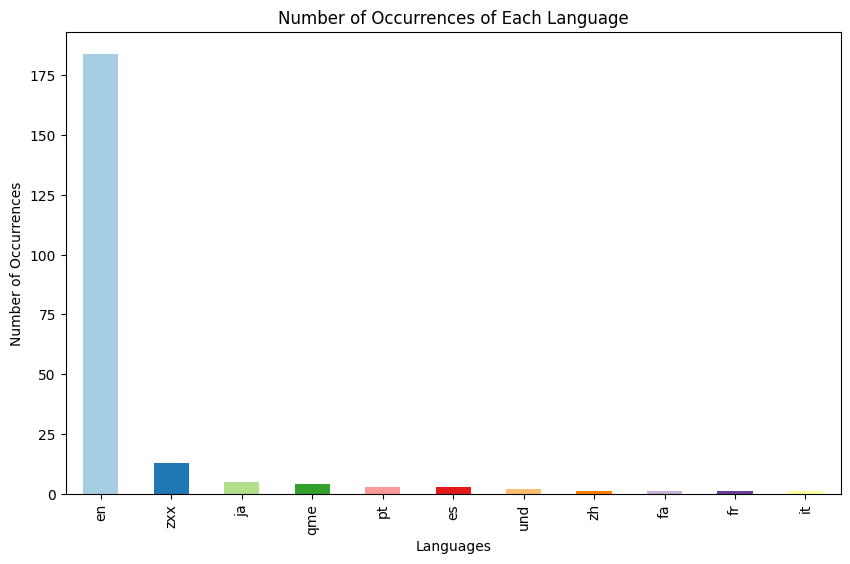

In [6]:
language_counts = df['lang'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color=plt.cm.Paired(range(len(language_counts))))

# Adding labels and title
plt.xlabel('Languages')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences of Each Language')

# Show the plot
plt.show()

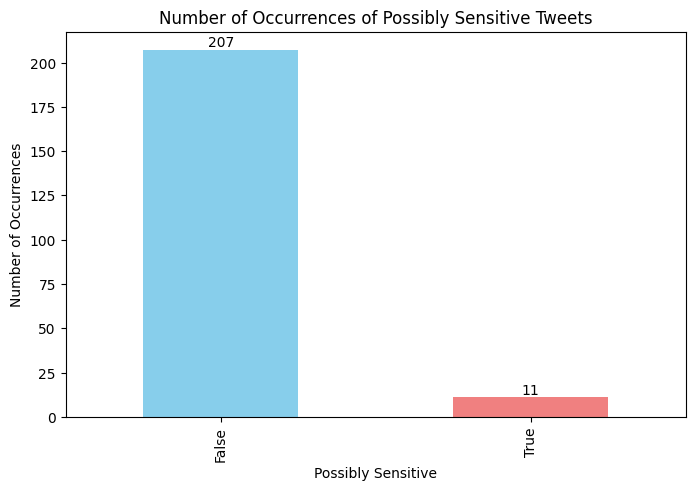

In [7]:
# Count the occurrences of each sensitivity value
sensitivity_counts = df['possibly_sensitive'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(8, 5))
sensitivity_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])

# Adding labels and title
plt.xlabel('Possibly Sensitive')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences of Possibly Sensitive Tweets')

# Adding annotations
for i, count in enumerate(sensitivity_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

In [9]:
df['entities'][0]

'{\'annotations\': [{\'end\': 12, \'normalized_text\': \'Britain\', \'probability\': 0.7994, \'start\': 6, \'type\': \'Place\'}, {\'end\': 46, \'normalized_text\': \'Sputnik\', \'probability\': 0.5727, \'start\': 40, \'type\': \'Organization\'}, {\'end\': 68, \'normalized_text\': \'Anton Anisimov\', \'probability\': 0.8568, \'start\': 55, \'type\': \'Person\'}], \'urls\': [{\'description\': \'31.03.2022, Sputnik International\', \'display_url\': \'sputniknews.com/20220331/great…\', \'end\': 94, \'expanded_url\': \'https://sputniknews.com/20220331/great-britain-imposes-sanctions-against-sputniks-head-anton-anisimov-1094354237.html\', \'images\': [{\'height\': 1166, \'url\': \'https://pbs.twimg.com/news_img/1509472794295345153/9B1X8U2g?format=jpg&name=orig\', \'width\': 2072}, {\'height\': 150, \'url\': \'https://pbs.twimg.com/news_img/1509472794295345153/9B1X8U2g?format=jpg&name=150x150\', \'width\': 150}], \'start\': 71, \'status\': 200, \'title\': "Great Britain Imposes Sanctions Agai

In [10]:

# Count the number of unique authors
unique_authors_count = df['author_id'].nunique()

# Print the result
print("Number of unique authors:", unique_authors_count)

Number of unique authors: 158


In [12]:

# Count the number of unique conversations
unique_authors_count = df['conversation_id'].nunique()

# Print the result
print("Number of unique authors:", unique_authors_count)

Number of unique authors: 73


In [16]:
df_without_nan = df.dropna(subset=['withheld'])

In [21]:
(df_without_nan['author_id'])

2      34262462.0
4      34262462.0
26     34262462.0
27     34262462.0
57     34262462.0
59     34262462.0
62     34262462.0
63     34262462.0
140    34262462.0
169    34262462.0
189    64643056.0
215    34262462.0
Name: author_id, dtype: float64

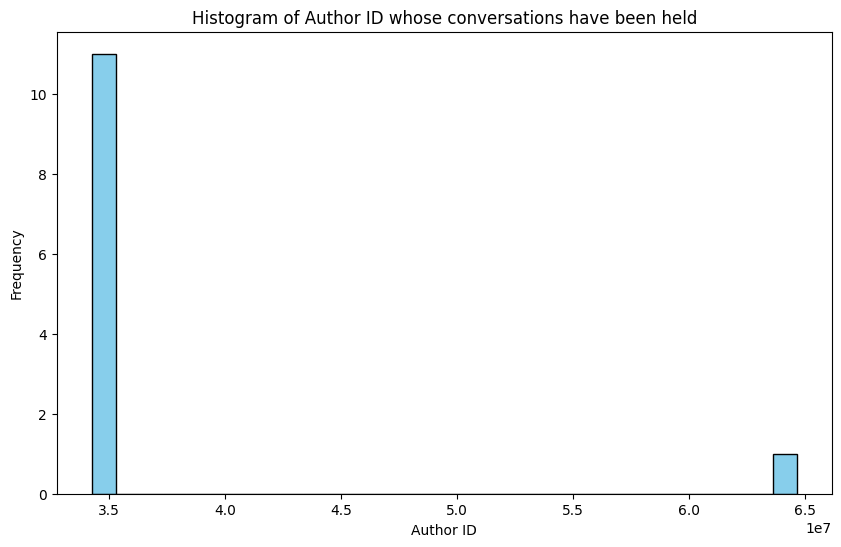

In [23]:

df_with_withheld = df.dropna(subset=['withheld'])

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_with_withheld['author_id'], bins=30, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Author ID')
plt.ylabel('Frequency')
plt.title('Histogram of Author ID whose conversations have been held')

# Show the plot
plt.show()

In [26]:
import seaborn as sns

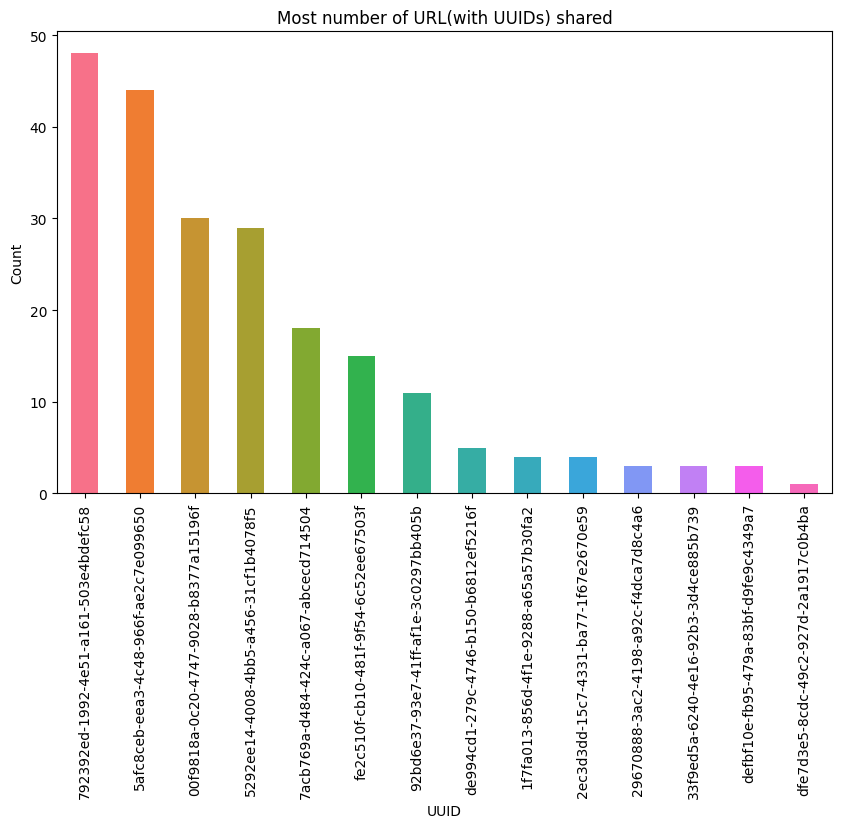

In [28]:
uuid_counts = df['uuid'].value_counts()

# Create a color palette with different colors for each UUID
palette = sns.color_palette("husl", n_colors=len(uuid_counts))

# Plotting the bar plot
plt.figure(figsize=(10, 6))
uuid_counts.plot(kind='bar', color=palette)

# Adding labels and title
plt.xlabel('UUID')
plt.ylabel('Count')
plt.title('Most number of URL(with UUIDs) shared')

# Show the plot
plt.show()

In [31]:
import ast

In [33]:
df['public_metrics'] = df['public_metrics'].apply(ast.literal_eval)

# Create a new 'like_count' column
df['like_count'] = df['public_metrics'].apply(lambda x: x['like_count'])

# Display the DataFrame

ValueError: malformed node or string: {'like_count': 3, 'quote_count': 0, 'reply_count': 1, 'retweet_count': 0}

In [35]:
df['like_count']

0       3
1       0
2       2
3       0
4      10
       ..
213     0
214     0
215     8
216     0
217     1
Name: like_count, Length: 218, dtype: int64

In [36]:
likes_per_conversation = df.groupby('conversation_id')['like_count'].sum().reset_index()

In [38]:
likes_per_conversation 

,conversation_id,like_count
0,1.509400e+18,9
1,1.509470e+18,12
2,1.509490e+18,43
3,1.509510e+18,3
4,1.509520e+18,2
...,...,...
68,1.515870e+18,7
69,1.520610e+18,0
70,1.523860e+18,0
71,1.531240e+18,0


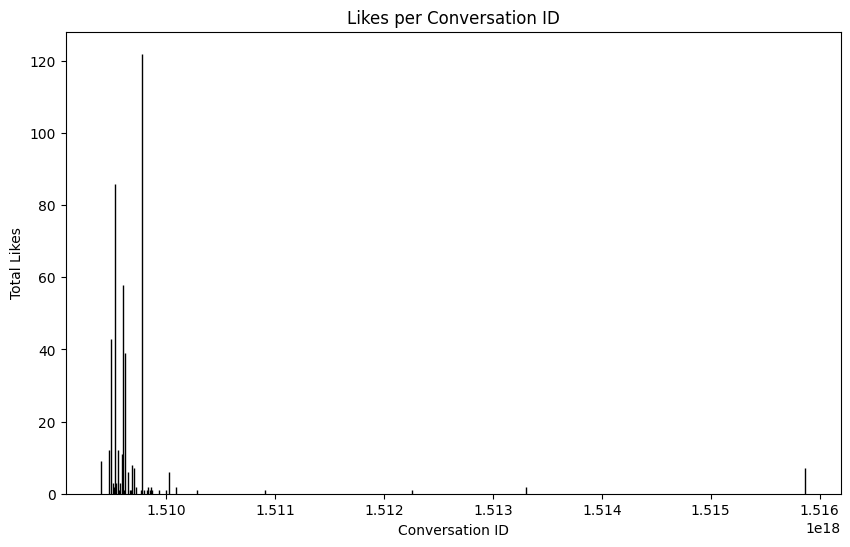

In [45]:
plt.figure(figsize=(10, 6))
plt.bar(likes_per_conversation['conversation_id'], likes_per_conversation['like_count'], color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Conversation ID')
plt.ylabel('Total Likes')
plt.title('Likes per Conversation ID')

# Show the plot
plt.show()